In [32]:
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [33]:
data = pd.read_csv('car_price_dataset.csv')
data.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [34]:
# Display overall info
print("==== Overall Data Info ====")
data.info()

# Identify numerical and categorical columns
num_cols = data.select_dtypes(include=['number']).columns
cat_cols = data.select_dtypes(include=['object', 'category']).columns

# Print information for numerical columns
print("\n==== Numerical Columns ====")
print("Columns:", list(num_cols))
print("\nDescriptive Statistics for Numerical Columns:")
print(data[num_cols].describe())

# Print information for categorical columns
print("\n==== Categorical Columns ====")
print("Columns:", list(cat_cols))
print("\nDescriptive Statistics for Categorical Columns:")
print(data[cat_cols].describe(include='all'))

# Optionally, list value counts for each categorical column
for col in cat_cols:
    print(f"\nUnique value counts for '{col}':")
    print(data[col].value_counts())

==== Overall Data Info ====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB

==== Numerical Columns ====
Columns: ['Year', 'Engine_Size', 'Mileage', 'Doors', 'Owner_Count', 'Price']

Descriptive Statistics for Numerical Columns:
               Year   Engine_Size        Mileage         Doors   Owner_Count  \
count  10000.000000  10000.000000   10000.000000  1

In [35]:
# Combine "Brand" and "Model" into one new column "Brand Model"
data["Brand Model"] = data["Brand"] + " " + data["Model"]

# Drop the original "Brand" and "Model" columns
data = data.drop(columns=["Brand", "Model"])

# Identify the remaining categorical columns (after merging Brand and Model)
categorical_cols = data.select_dtypes(include=["object"]).columns
print("Categorical columns to be encoded:", list(categorical_cols))

# One-hot encode the categorical columns using pd.get_dummies
# Using drop_first=True to avoid multicollinearity
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the encoded data
print("Encoded DataFrame:")
print(data_encoded.head())

Categorical columns to be encoded: ['Fuel_Type', 'Transmission', 'Brand Model']
Encoded DataFrame:
   Year  Engine_Size  Mileage  Doors  Owner_Count  Price  Fuel_Type_Electric  \
0  2020          4.2   289944      3            5   8501               False   
1  2012          2.0     5356      2            3  12092               False   
2  2020          4.2   231440      4            2  11171               False   
3  2023          2.0   160971      2            1  11780                True   
4  2003          2.6   286618      3            3   2867               False   

   Fuel_Type_Hybrid  Fuel_Type_Petrol  Transmission_Manual  ...  \
0             False             False                 True  ...   
1              True             False                False  ...   
2             False             False                False  ...   
3             False             False                 True  ...   
4              True             False                False  ...   

   Brand Model_Ki

In [36]:
# Define features and target (Price)
X = data_encoded.drop(columns=["Price"])
y = data_encoded["Price"]

# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (8000, 39)
Test set shape: (2000, 39)


In [37]:
# Instantiate the model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

print("Model training complete.")


Model training complete.


Test R²: 0.9995413573363514


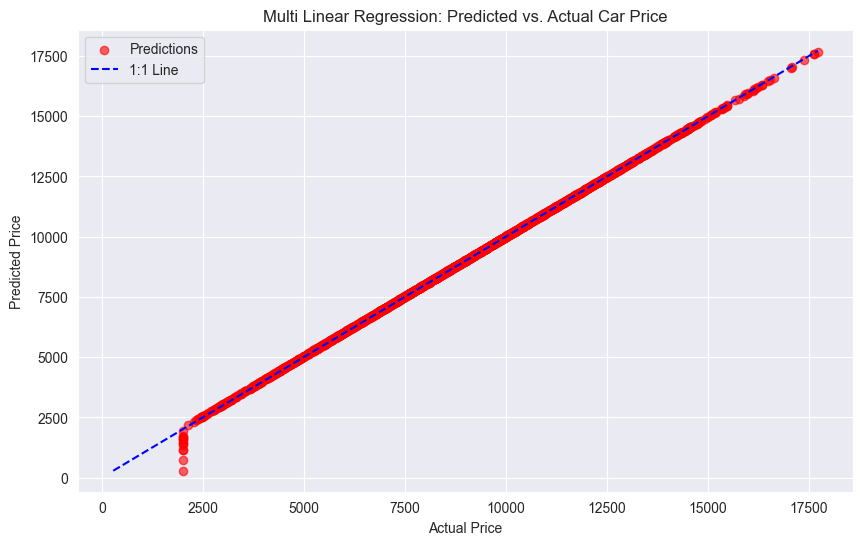

In [38]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Compute and print the R² score
r2 = r2_score(y_test, y_pred)
print("Test R²:", r2)

# Create the scatter plot: Actual Prices (x-axis) vs Predicted Prices (y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='red', alpha=0.6, label='Predictions')

# Plot the 1:1 line for reference (perfect predictions)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'b--', label='1:1 Line')

# Label the plot
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multi Linear Regression: Predicted vs. Actual Car Price')
plt.legend()
plt.show()


## Attempt 2 - Removing outliers

In [39]:
# 1) Filter out potential outliers or suspiciously low-priced cars
data_no_outliers = data_encoded[data_encoded["Price"] >= 2500].copy()

# 2) Separate features (X) and target (y)
X_no_outliers = data_no_outliers.drop(columns=["Price"])
y_no_outliers = data_no_outliers["Price"]

# 3) Split into training (80%) and testing (20%)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X_no_outliers,
    y_no_outliers,
    test_size=0.2,
    random_state=42
)

print("Training set shape:", X_train2.shape)
print("Test set shape:", X_test2.shape)


Training set shape: (7867, 39)
Test set shape: (1967, 39)


In [40]:

# Instantiate a new Linear Regression model
model2 = LinearRegression()

# Fit the model on the filtered training data
model2.fit(X_train2, y_train2)

print("Model training complete (after removing low-price outliers).")


Model training complete (after removing low-price outliers).


Test R² (no outliers): 0.999999990963915


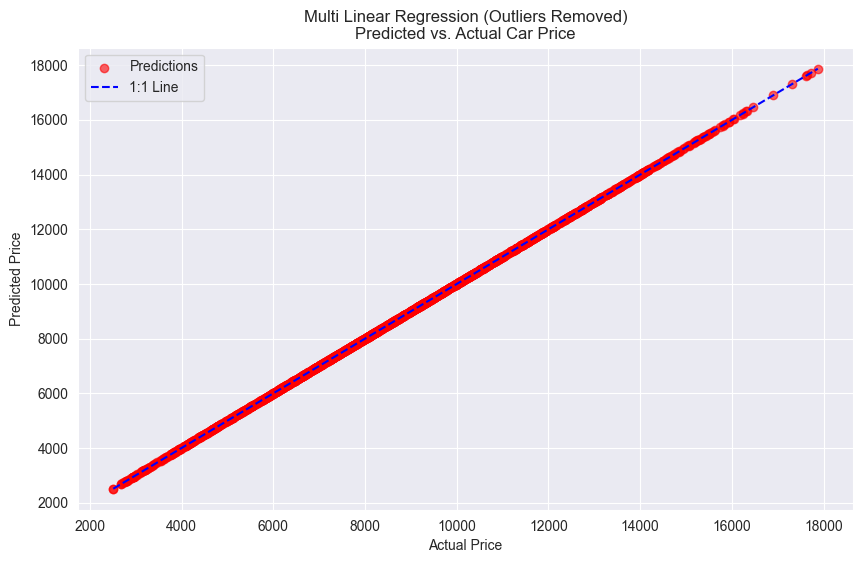

In [41]:
# Predict on the test set
y_pred2 = model2.predict(X_test2)

# Compute the R² score
r2_2 = r2_score(y_test2, y_pred2)
print("Test R² (no outliers):", r2_2)

# Plot: Actual Price (x-axis) vs. Predicted Price (y-axis)
plt.figure(figsize=(10, 6))
plt.scatter(y_test2, y_pred2, color='red', alpha=0.6, label='Predictions')

# 1:1 reference line
min_val = min(y_test2.min(), y_pred2.min())
max_val = max(y_test2.max(), y_pred2.max())
plt.plot([min_val, max_val], [min_val, max_val], 'b--', label='1:1 Line')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multi Linear Regression (Outliers Removed)\nPredicted vs. Actual Car Price')
plt.legend()
plt.show()
